In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
link2data = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(link2data)
df = df.dropna()
df.info()
dfp = df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


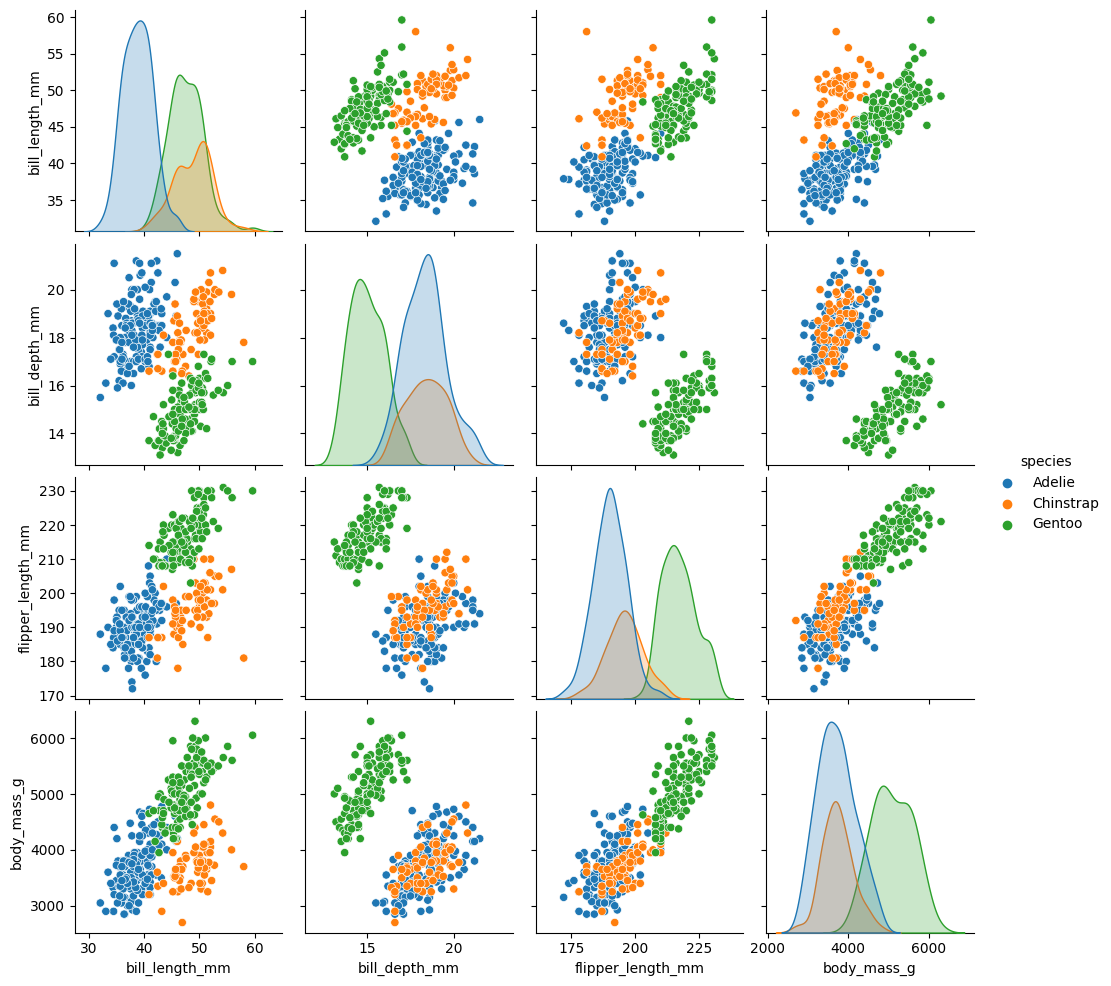

In [ ]:
sns.pairplot(dfp, hue = 'species')

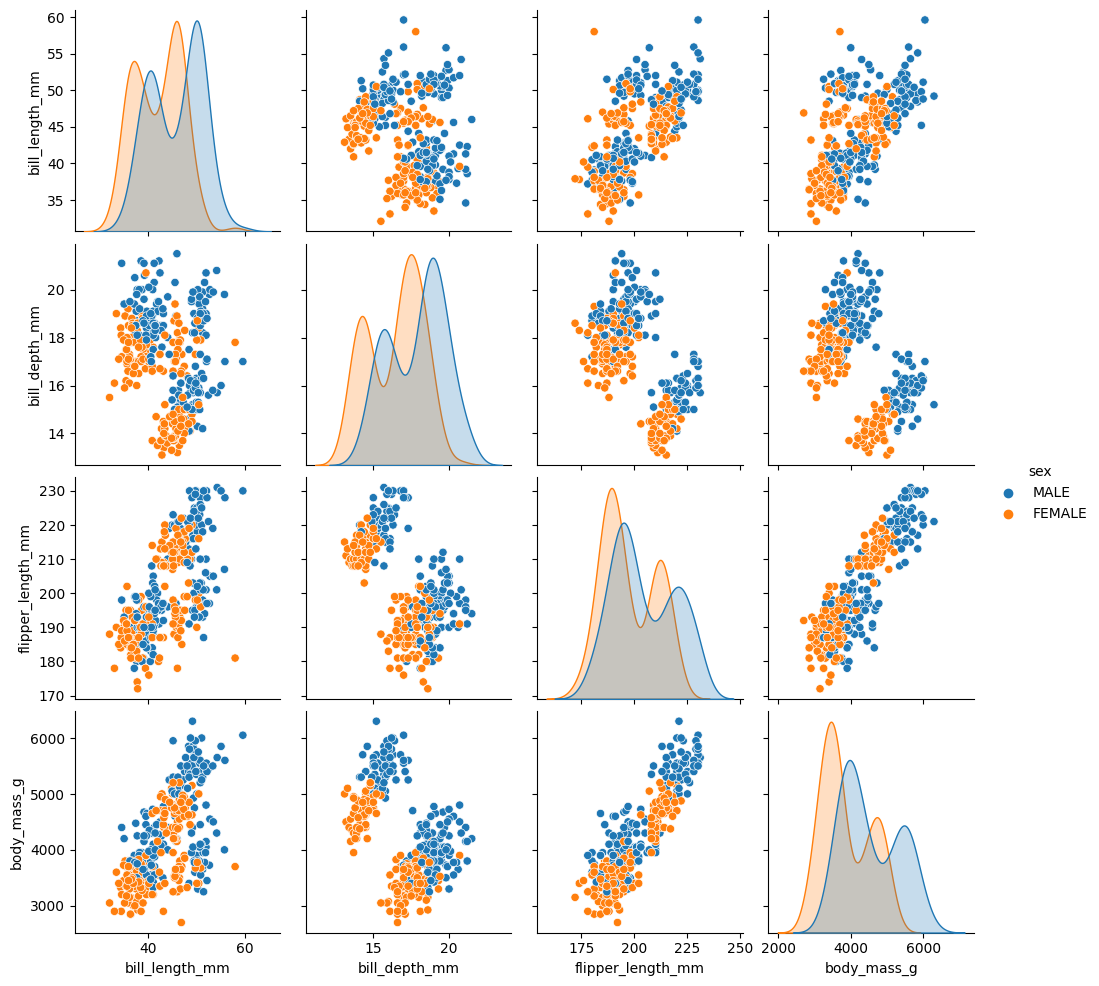

In [ ]:
sns.pairplot(dfp, hue = 'sex')

Четко видно разделение по группам, модель регрессии была бы замечательной.

In [ ]:
dfp_data=dfp.select_dtypes(np.number)
dfp_data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [ ]:
dfp_data.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [ ]:
pca = PCA(n_components=4)
dfp_pca= pca.fit_transform(dfp_data)

In [ ]:
pc_df = pd.DataFrame(data = dfp_pca , columns = ['PC1', 'PC2','PC3', 'PC4'])
pc_df['Sex']=dfp.sex
pc_df['Species']=dfp.species
pc_df.head()

,PC1,PC2,PC3,PC4,Sex,Species
0,-457.325073,13.351587,1.236560,-0.335803,MALE,Adelie
1,-407.252205,9.179113,-0.048921,-1.039967,FEMALE,Adelie
2,-957.044676,-8.160444,-2.525781,0.815745,FEMALE,Adelie
3,-757.115802,-1.867653,-4.908890,2.163656,NaN,NaN
4,-557.177302,3.389158,-1.150966,2.702623,FEMALE,Adelie


In [ ]:
var_expl=pca.explained_variance_ratio_
var_expl

array([9.99893229e-01, 7.82232504e-05, 2.49073610e-05, 3.63992867e-06])

Text(0.5, 1.0, 'PCA без масштабирования данных')

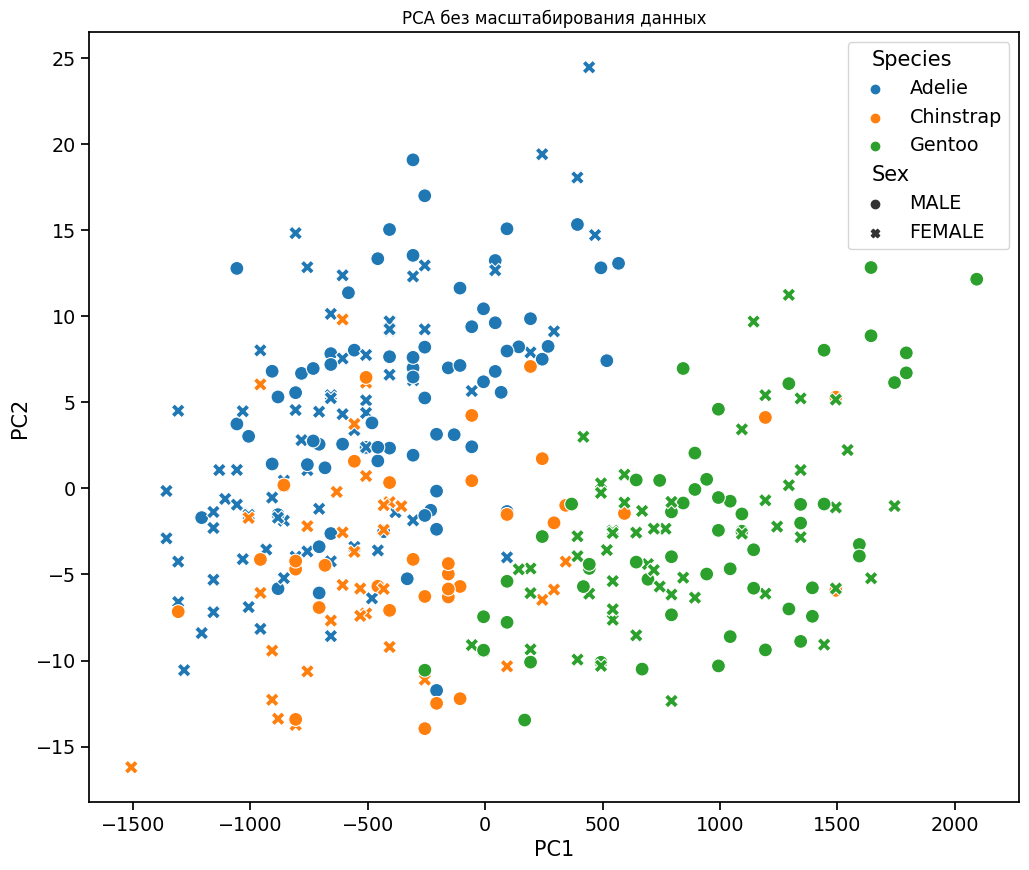

In [ ]:
plt.figure(figsize=(12,10))
with sns.plotting_context("notebook",font_scale=1.25):
    sns.scatterplot(x="PC1", y="PC2",
                    data=pc_df,
                    hue="Species",
                    style="Sex",
                    s=100)
plt.title('PCA без масштабирования данных')

Теперь нормализуем данные

In [ ]:
random_state = 0
pca_scaled = make_pipeline(StandardScaler(),PCA(n_components=4, random_state=random_state))

In [ ]:
dfp_pcs=pca_scaled.fit_transform(dfp_data)
pca_scaled.named_steps['standardscaler'].fit_transform(dfp_data)

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [ ]:
pca_scaled.named_steps['pca']
PCA(copy=True, iterated_power='auto', n_components=4, random_state=0, svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=4, random_state=0)

In [ ]:
var_expl_sc=pca_scaled.named_steps['pca'].explained_variance_ratio_
var_expl_sc

array([0.68633893, 0.19452929, 0.09216063, 0.02697115])

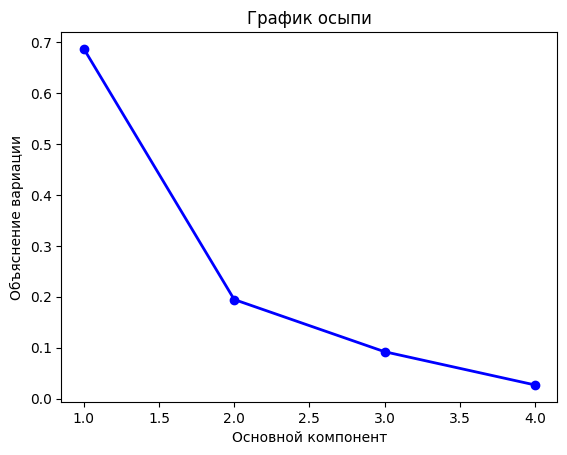

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, var_expl_sc, 'o-', linewidth= 2, color='blue')
plt.title('График осыпи')
plt.xlabel('Основной компонент')
plt.ylabel('Объяснение вариации')
plt.show()

In [ ]:
pc_scaled_df = pd.DataFrame(data = dfp_pcs ,columns = ['PC1', 'PC2','PC3', 'PC4'])
pc_scaled_df['Species'] = dfp.species
pc_scaled_df['Sex'] = dfp.sex
pc_scaled_df.head()

,PC1,PC2,PC3,PC4,Species,Sex
0,-1.853593,0.032069,-0.234902,0.528397,Adelie,MALE
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie,FEMALE
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie,FEMALE
3,-1.885288,-0.012351,-0.628873,-0.472893,NaN,NaN
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie,FEMALE


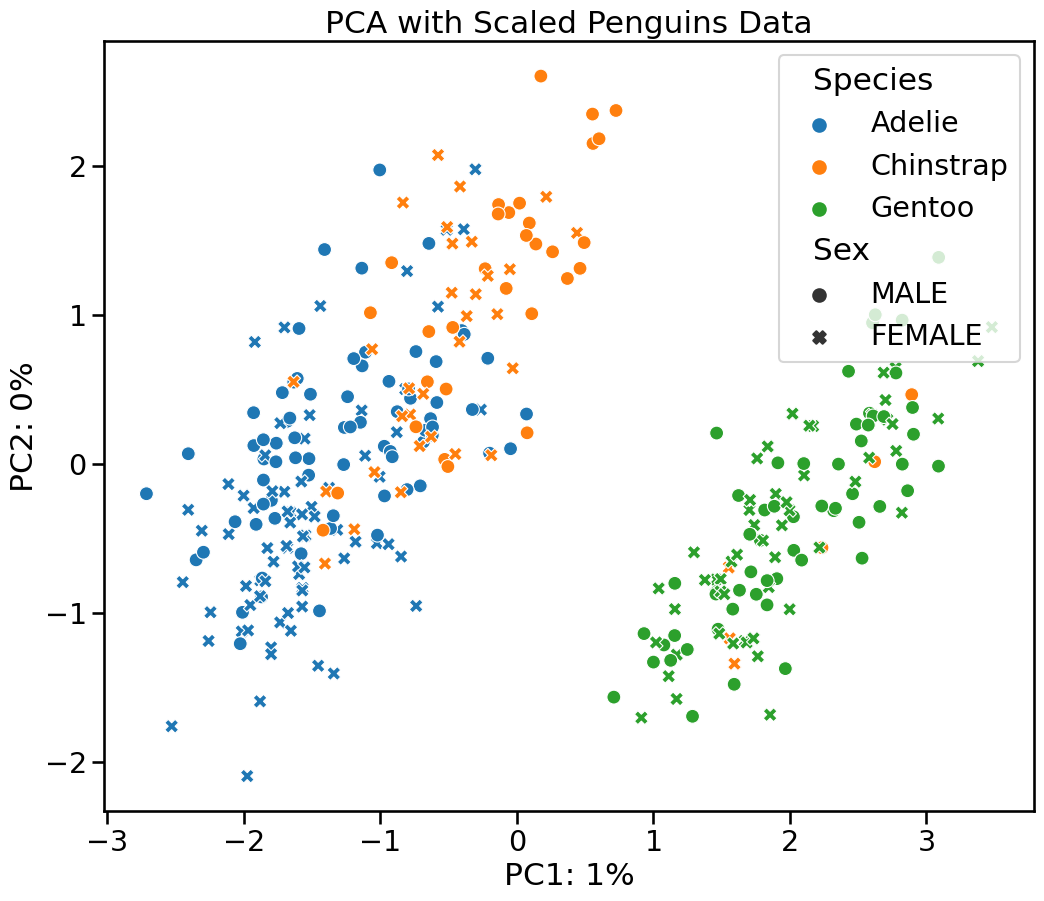

In [ ]:
plt.figure(figsize=(12,10))
with sns.plotting_context('talk',font_scale=1.25):
    sns.scatterplot(x='PC1', y='PC2',
                    data=pc_scaled_df,
                    hue='Species',
                    style='Sex',
                    s=100)
    plt.xlabel('PC1: '+f'{var_expl_sc[0]:.0f}'+'%')
    plt.ylabel('PC2: '+f'{var_expl_sc[1]:.0f}'+'%')
    plt.title('PCA with Scaled Penguins Data')

In [ ]:
link = 'https://datahub.io/machine-learning/iris/r/iris.csv'
df = pd.read_csv(link)
df = df.dropna()
df.info()
dfi = df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


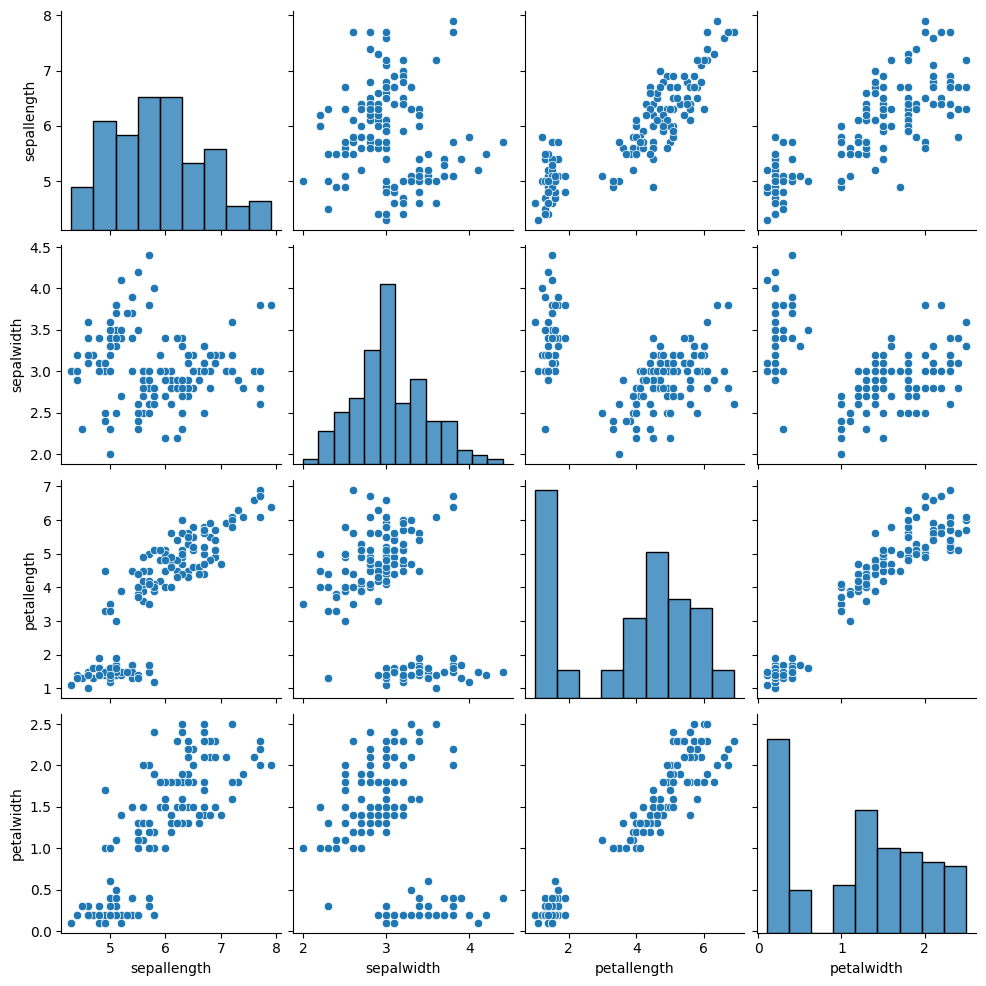

In [ ]:
sns.pairplot(dfi)

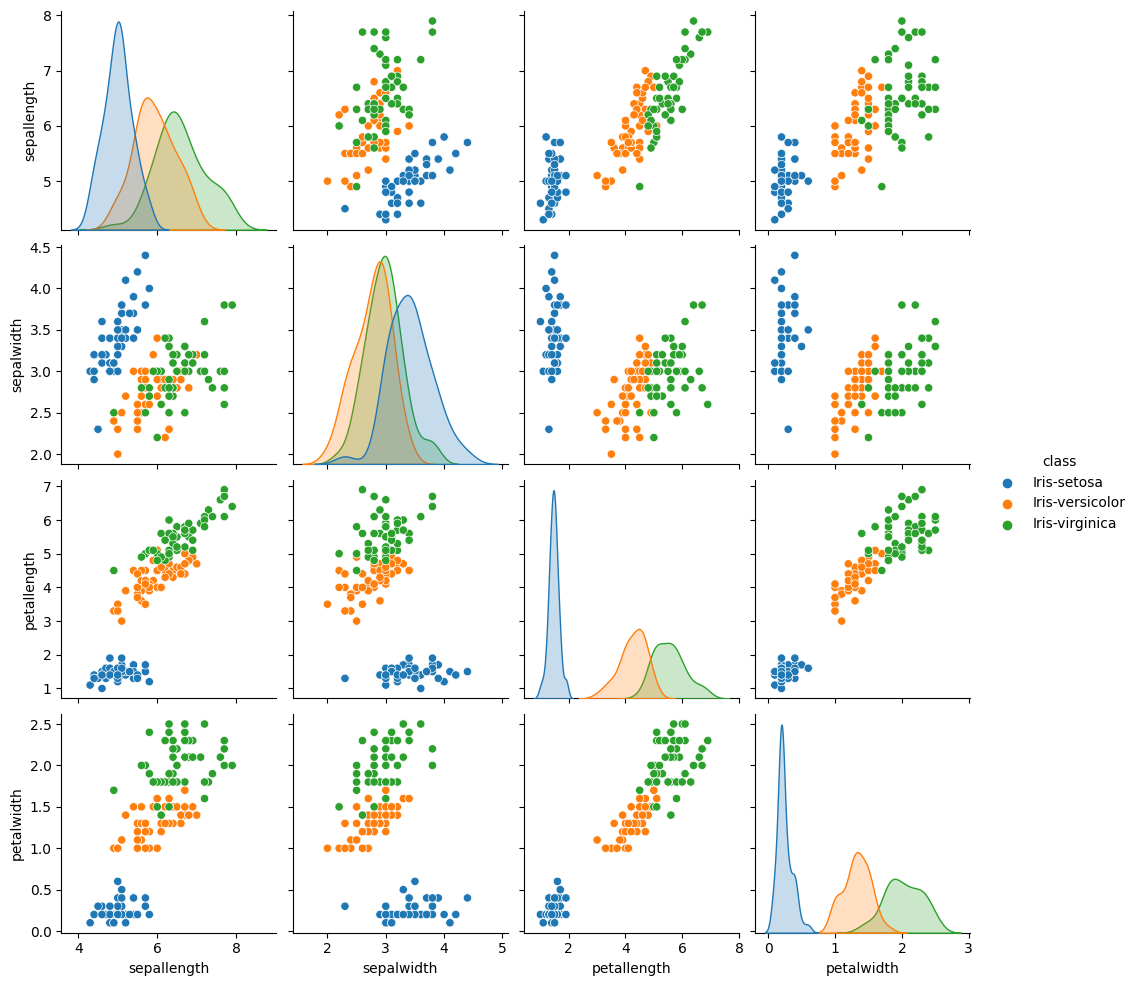

In [ ]:
sns.pairplot(dfi,hue='class')

Здесь видно, что данные распределены нормально, четко прослеживается разделение по группам.

In [ ]:
dfi.corr()

<ipython-input-31-5d96a281ecd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfi.corr()


,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


Выполним анаилз сразу с нормализацией данных

In [ ]:
dfi_new = dfi.select_dtypes(np.number)

In [ ]:
random_state = 0
pca_scaled = make_pipeline(StandardScaler(),
PCA(n_components=4, random_state=random_state))

In [ ]:
dfi_pcs=pca_scaled.fit_transform(dfi_new)

In [ ]:
pca_scaled.named_steps['standardscaler'].fit_transform(dfi_new)

In [ ]:
pca_scaled.named_steps['pca']
PCA(copy=True, iterated_power='auto', n_components=4, random_state=0, svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=4, random_state=0)

In [ ]:
var_expl_sc=pca_scaled.named_steps['pca'].explained_variance_ratio_
var_expl_sc

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

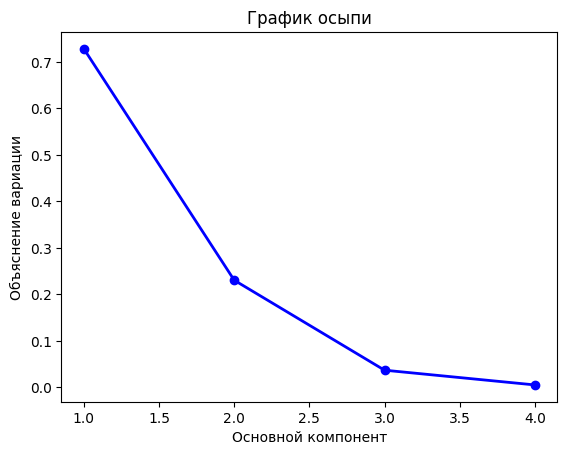

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, var_expl_sc, 'o-', linewidth= 2, color='blue')
plt.title('График осыпи')
plt.xlabel('Основной компонент')
plt.ylabel('Объяснение вариации')
plt.show()

In [ ]:
pc_scaled_df = pd.DataFrame(data = dfi_pcs ,columns = ['PC1', 'PC2','PC3', 'PC4'])
pc_scaled_df['Class'] = dfi['class']
pc_scaled_df.head()

,PC1,PC2,PC3,PC4,Class
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


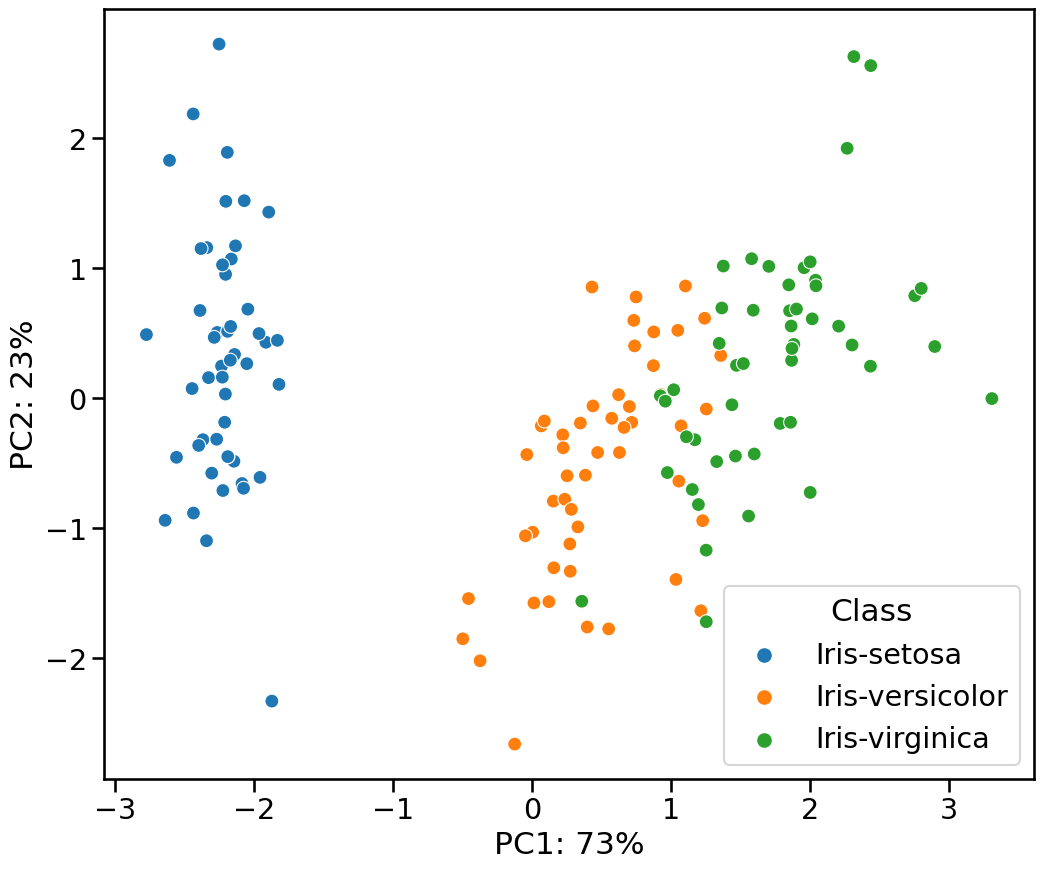

In [ ]:
plt.figure(figsize=(12,10))
with sns.plotting_context('talk',font_scale=1.25):
    sns.scatterplot(x='PC1', y='PC2',
                    data=pc_scaled_df,
                    hue='Class',
                    s=100)
    plt.xlabel(f'PC1: {var_expl_sc[0] * 100:.0f} %')
    plt.ylabel('PC2: '+f'{var_expl_sc[1] * 100:.0f}'+'%')

Замечательный результат